In [1]:
import pandas as pd
json_df = pd.read_json("./data_final.json")
# json_df[["HDI_male", "HDI_female"]][json_df["Year"]==1995]
json_df

,Country,Country_Code,Year,HDI_male,HDI_female,GDI
0,Afghanistan,AFG,2000,0.429,0.138,0.322
1,Afghanistan,AFG,2005,0.508,0.264,0.519
2,Afghanistan,AFG,2010,0.553,0.329,0.595
3,Afghanistan,AFG,2011,0.557,0.339,0.609
4,Afghanistan,AFG,2012,0.566,0.350,0.618
...,...,...,...,...,...,...
2065,Zimbabwe,ZWE,2016,0.581,0.538,0.927
2066,Zimbabwe,ZWE,2017,0.586,0.543,0.927
2067,Zimbabwe,ZWE,2018,0.591,0.548,0.927
2068,Zimbabwe,ZWE,2019,0.590,0.550,0.931


In [2]:
json_npy = json_df[["HDI_male", "HDI_female"]].to_numpy()
json_df[["HDI_male", "HDI_female"]]

,HDI_male,HDI_female
0,0.429,0.138
1,0.508,0.264
2,0.553,0.329
3,0.557,0.339
4,0.566,0.350
...,...,...
2065,0.581,0.538
2066,0.586,0.543
2067,0.591,0.548
2068,0.590,0.550


In [3]:
json_npy

array([[0.429, 0.138],
       [0.508, 0.264],
       [0.553, 0.329],
       ...,
       [0.591, 0.548],
       [0.59 , 0.55 ],
       [0.75 , 0.724]])

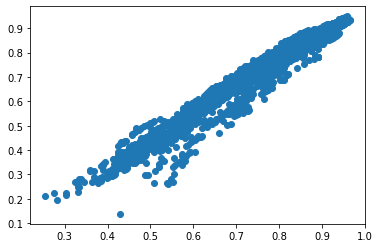

In [4]:
import matplotlib.pyplot as plt

plt.scatter(json_npy[:,0], json_npy[:,1])

In [5]:
# n_clusters = 3 is the k value

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [6]:
# Fit the model to the data
kmeans.fit(json_npy)

KMeans(n_clusters=3)

In [7]:
# Predict the clusters
predicted_clusters = kmeans.predict(json_npy)

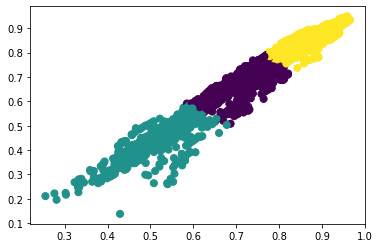

In [8]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# Visual validation
plt.scatter(json_npy[:,0], json_npy[:,1], c=predicted_clusters, s=50, cmap='viridis')

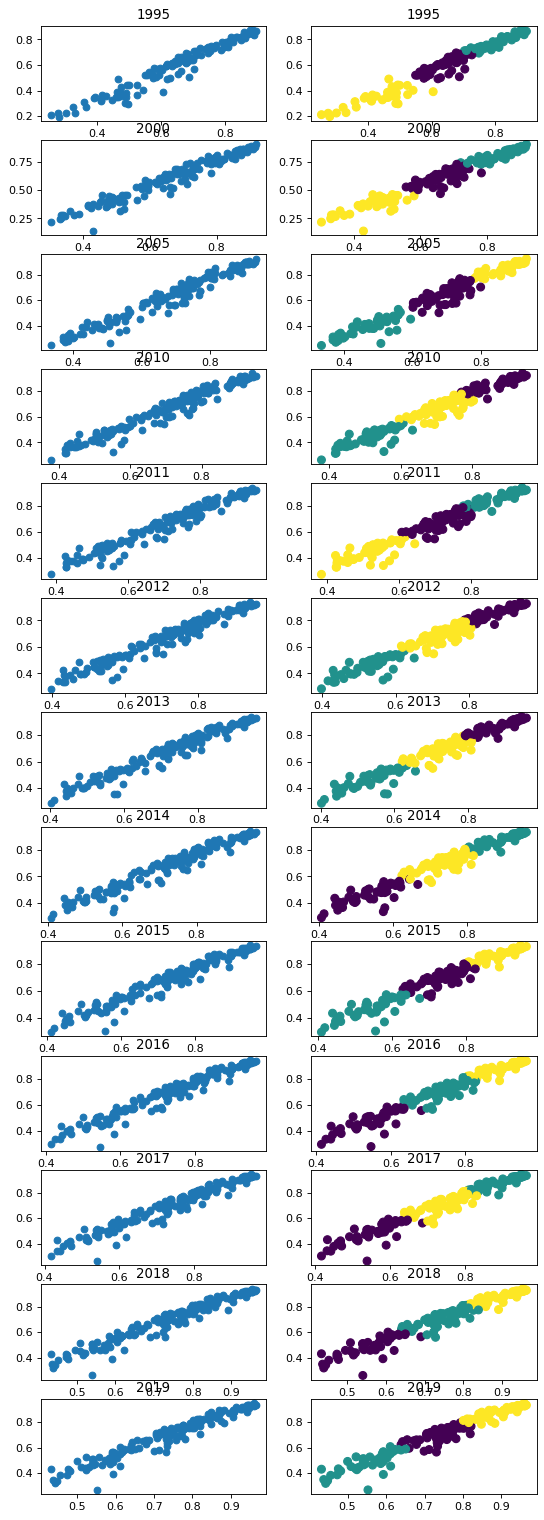

In [9]:
list_years = [1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

fig = plt.figure(1, figsize=(8, 30), dpi=80)

position = 1
for year in list_years:
    json_npy = json_df[["HDI_male", "HDI_female"]][json_df["Year"]==year].to_numpy()
    # print(json_npy)

    try:

        ax = fig.add_subplot(16, 2, position)
        plt.scatter(json_npy[:,0], json_npy[:,1])
        plt.title(year)

        kmeans.fit(json_npy)

        predicted_clusters = kmeans.predict(json_npy)

        ax = fig.add_subplot(16, 2, position+1)
        plt.scatter(json_npy[:,0], json_npy[:,1], c=predicted_clusters, s=50, cmap='viridis')
        plt.title(year)

        position = position + 2
    except:
        print("No Data:", year)
plt.show()

In [10]:
json_df[json_df["Year"]==1995][json_df["Country"]=="Bahamas"]

D:\pablo\anaconda3\envs\project3ML\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Country,Country_Code,Year,HDI_male,HDI_female,GDI


In [11]:
import plotly.express as px

fig = px.line(json_df, x='Year', y='GDI', color='Country')
fig.show()

In [12]:
fig = px.scatter(json_df, x='Year', y='GDI', color='Country')
fig.show()